# Subscription: Using gender and experience to classify subscription trends

### Introduction

In modern days, video games have become one of the major interactive entertainment software played on various devices worldwide, offering a wide range of types and genres. Whether it is competitive or non-competitive, single-player or multiplayer, along with graphics and audio that mimic the player's narrative. With the advancement of video games, the growth in the number and gender of the players varies, and their experience skills can also differ among individuals. 

In this project, we are aiming to answer the question: Does the gender and experience of the player contribute to the amount of subscription. Particularly, we will focus on the relationship between the subsciption and the other two variables stated.

### Dataset Description
We will be using the players dataset that's uploaded. The data include the experience of the player from Beginner, Amateur, Regular, Veteran, and Pro, as well as their gender and whether they subscribed or not. The dataset also includes additional variables like hours played, age, name, and email of the players, but in this case, we will not be using them. 

**Setting up libraries** 

We first need to import the libraries we need to be able to manipulate the data easier. 

In [122]:
### importing libraries
library(tidyverse)
library(RColorBrewer)
library(dplyr)
library(tidymodels)

**Loading Data**

We can now start importing the database and assigning it to an object that can be used later. First, the link to the raw dataset is assigned to the url object. Later, we used the url object we just made, and then loading it into the read_csv function to give us a data table with the data on it.

In [117]:
url <- "https://raw.githubusercontent.com/jjul1ee/individual_planning_report/refs/heads/main/players.csv"

players <- read_csv(url)
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


After loading in the original database, we want to select out **subscribe**, **gender**, and **experience** since these three variables are the main factors. We use the original database and pipe it into our select function, where we selected out the three variables using c(). We assign all of this data into a new object called players_select and call object to get the new selected database.


In [118]:
players_select <- players |>
select(c(experience, gender, subscribe))
players_select

experience,gender,subscribe
<chr>,<chr>,<lgl>
Pro,Male,TRUE
Veteran,Male,TRUE
Veteran,Male,FALSE
Amateur,Female,TRUE
Regular,Male,TRUE
Amateur,Female,TRUE
Regular,Female,TRUE
Amateur,Male,FALSE
Amateur,Male,TRUE


We now selected out the variables we need to optimize in a more easy and organized way. We can then filter out the subscribed players from the selected database, and store it in players_subscribe.

In [119]:
players_subscribe <- players_select |>
filter(subscribe == 'TRUE') 
players_subscribe

experience,gender,subscribe
<chr>,<chr>,<lgl>
Pro,Male,TRUE
Veteran,Male,TRUE
Amateur,Female,TRUE
Regular,Male,TRUE
Amateur,Female,TRUE
Regular,Female,TRUE
Amateur,Male,TRUE
Veteran,Female,TRUE
Veteran,Female,TRUE


**Data Visualization**

After we get our data selected and filtered, we can plot it through the ggplot function and visually observe our data. We are going to create a bar graph with different experience categories and the number of subscriptions within each category. Each gender will be a different colour, which can be easily observed. All will be assigned to an object called players_plot. 

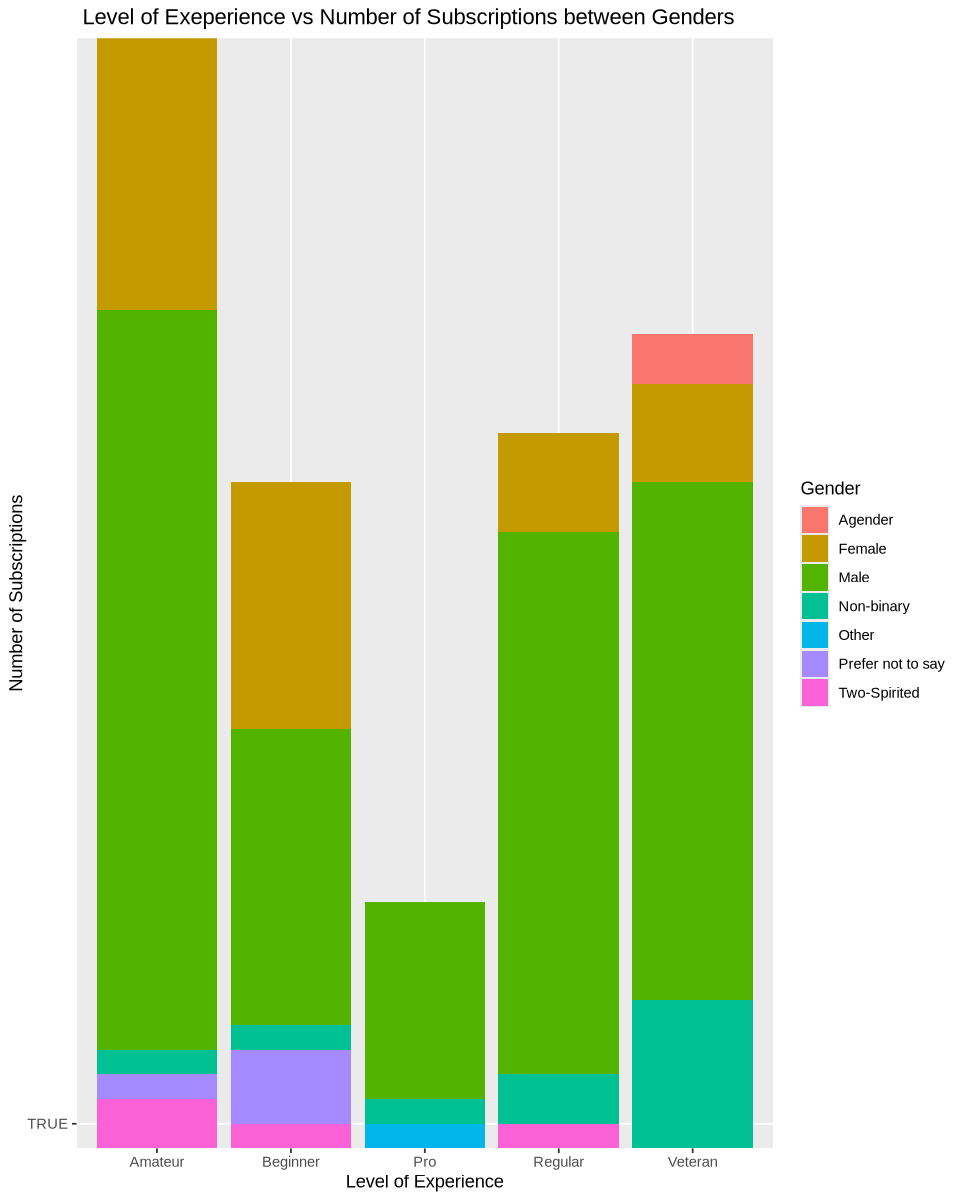

In [120]:
options(repr.plot.width = 8, repr.plot.height = 10)
players_plot <- players_subscribe |>
ggplot(aes(x = experience, y = subscribe, fill = gender)) +
geom_bar(stat = 'identity') +
labs(x = "Level of Experience", y = "Number of Subscriptions", fill = "Gender") +
ggtitle(" Level of Exeperience vs Number of Subscriptions between Genders") 


players_plot

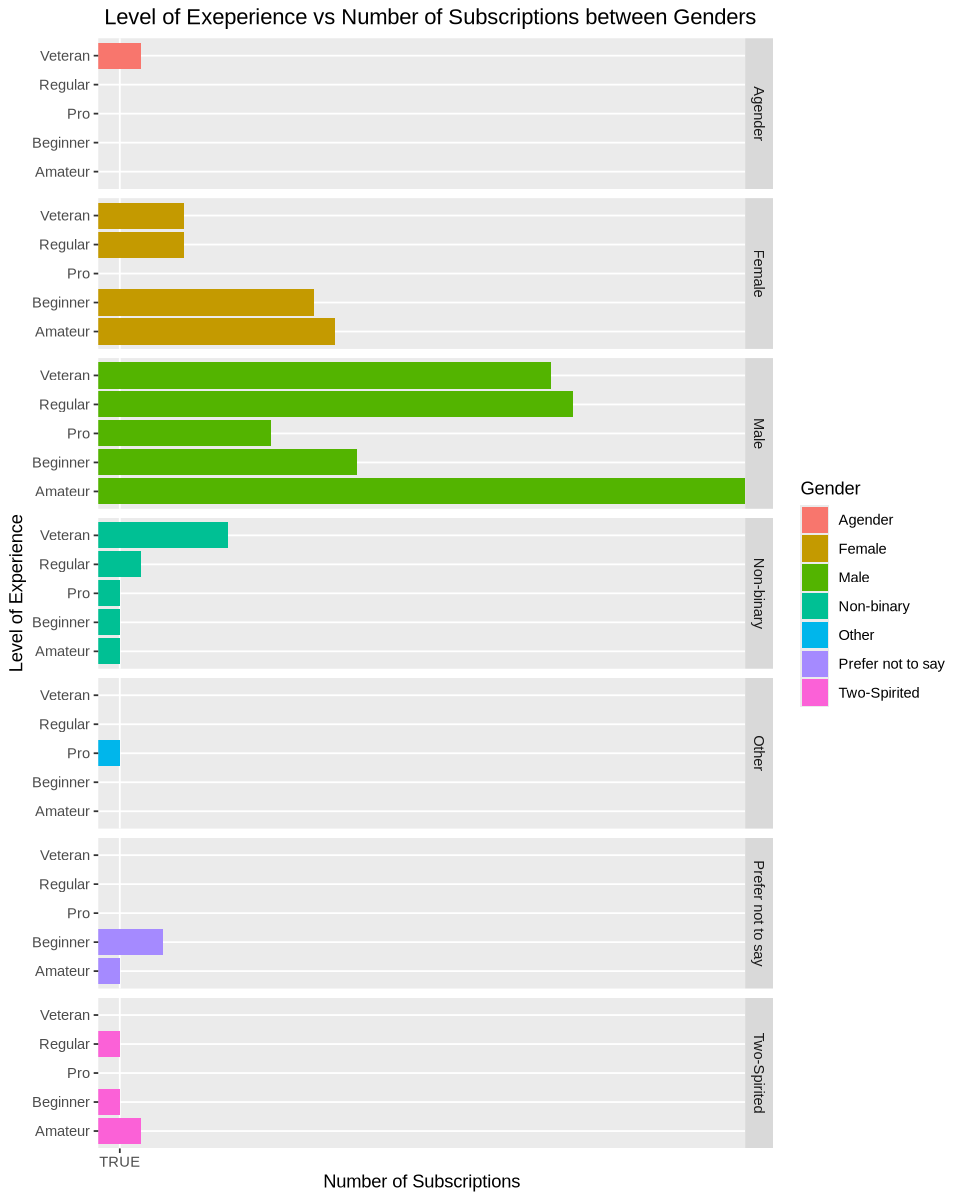

In [123]:
options(repr.plot.width = 8, repr.plot.height = 10)
players_facet_plot <- players_subscribe |>
ggplot(aes(x = experience, y = subscribe, fill = gender)) +
geom_bar(stat = 'identity') +
facet_grid(rows = vars(gender))+
labs(x = "Level of Experience", y = "Number of Subscriptions", fill = "Gender") +
ggtitle(" Level of Exeperience vs Number of Subscriptions between Genders") +
coord_flip() 

players_facet_plot

We can reorganize the original larger graph into smaller graphs that focus on one variable, which can make it easier to observe differences in the amounts of subscription between each gender.

### Methods

To classify the trend of subscriptions among players, we upload and read the .csv file. Then data undergoes data wrangling, where we select and filter the data we need. We then visualized it using graphs and smaller grids to observe the trends of player subscriptions.

Variables included in this project: 
1. **subscribe** : if the player subscribed or not
2. **gender** : what gender is the player
3. **experience** : what is the experience rank of the player

This method is appropriate because we want to observe if gender and experience contribute to the amount of subsciptions. We need to use a bar graph to compare between experience and the number of subscriptions since one variable is categorical and one is quantitative. 

We use this method to categorize the experience levels of the players and count the number of players who subscribed in each category. 

We are going to compare the number of subscribers in each experience rank and the number for each gender. We can use the larger bar graph to get a visualization of which experience rank has the total number of subscribers. Then we can look at the gender that took up the most amount in the bar graph. The second graph can give a visualization of the experience rank in different gender groups.

#### Visualizations:
1. **Bar Plot** : comparing variables of amounts between categories
2. **Box Plot** : separate plots for each gender and comparing variables of amount between categories

#### Potential Weakness and Limitations:

Some potential weakness of data wrangling and visualizations is that you can't predict data outside of the database. The conclusions you get are based on the database provided because the data recorded won't be a fixed representation of the data that are not included in this dataset. Since it is based on the dataset, there can be incomplete, outdated, or biased data, and these factors can exaggerate the data that can potentially impact the overall outcome. 